In [14]:
# open xlsx file from ../data folder
# read the file and create a dataframe

import pandas as pd

df = pd.read_excel('../data/c_frota_por_uf_municipio_cor_julho_2023.xlsx')

df.head()

UF   Município Cor Veículo  Qtd. Veículos
0  ACRE  ACRELANDIA     AMARELA            124
1  ACRE  ACRELANDIA        AZUL            735
2  ACRE  ACRELANDIA        BEGE             77
3  ACRE  ACRELANDIA      BRANCA           1177
4  ACRE  ACRELANDIA       CINZA            439

In [15]:
df['Cor Veículo'].unique()

array(['AMARELA', 'AZUL', 'BEGE', 'BRANCA', 'CINZA', 'DOURADA',
       'FANTASIA', 'GRENA', 'LARANJA', 'MARROM', 'PRATA', 'PRETA', 'ROSA',
       'ROXA', 'Sem Informação', 'VERDE', 'VERMELHA', 'Não Identificado',
       'Não se Aplica'], dtype=object)

In [16]:
# filter out all rows whose column 'Cor Veículo' in a list of colors
# and create a new dataframe

df2 = df[~df['Cor Veículo'].isin(['Sem Informação', 'Não Identificado', 'Não se Aplica'])]

df2 = df2[~df2['UF'].isin(['Sem Informação', 'Não Identificado', 'Não se Aplica'])]

df2

UF   Município Cor Veículo  Qtd. Veículos
0           ACRE  ACRELANDIA     AMARELA            124
1           ACRE  ACRELANDIA        AZUL            735
2           ACRE  ACRELANDIA        BEGE             77
3           ACRE  ACRELANDIA      BRANCA           1177
4           ACRE  ACRELANDIA       CINZA            439
...          ...         ...         ...            ...
88319  TOCANTINS     XAMBIOA       PRETA           1259
88320  TOCANTINS     XAMBIOA        ROSA              8
88321  TOCANTINS     XAMBIOA        ROXA             26
88323  TOCANTINS     XAMBIOA       VERDE            252
88324  TOCANTINS     XAMBIOA    VERMELHA           1648

[84061 rows x 4 columns]

In [17]:
df2['Cor Veículo'].unique()

array(['AMARELA', 'AZUL', 'BEGE', 'BRANCA', 'CINZA', 'DOURADA',
       'FANTASIA', 'GRENA', 'LARANJA', 'MARROM', 'PRATA', 'PRETA', 'ROSA',
       'ROXA', 'VERDE', 'VERMELHA'], dtype=object)

In [18]:
# import entropy function from scipy.stats

from scipy.stats import entropy

# group by 'UF' and 'Cor Veículo' and sum the values of 'Qtd. Veículos'

df3 = df2.groupby(['UF', 'Cor Veículo'])['Qtd. Veículos'].sum().reset_index()

df3

UF Cor Veículo  Qtd. Veículos
0         ACRE     AMARELA           4800
1         ACRE        AZUL          25142
2         ACRE        BEGE           2868
3         ACRE      BRANCA          66825
4         ACRE       CINZA          23335
..         ...         ...            ...
427  TOCANTINS       PRETA         182235
428  TOCANTINS        ROSA           1498
429  TOCANTINS        ROXA           2579
430  TOCANTINS       VERDE          26886
431  TOCANTINS    VERMELHA         196952

[432 rows x 3 columns]

In [19]:
df3.dtypes

UF               object
Cor Veículo      object
Qtd. Veículos     int64
dtype: object

In [20]:
df3.groupby('UF').transform('sum')

Cor Veículo  Qtd. Veículos
0    AMARELAAZULBEGEBRANCACINZADOURADAFANTASIAGRENA...         343154
1    AMARELAAZULBEGEBRANCACINZADOURADAFANTASIAGRENA...         343154
2    AMARELAAZULBEGEBRANCACINZADOURADAFANTASIAGRENA...         343154
3    AMARELAAZULBEGEBRANCACINZADOURADAFANTASIAGRENA...         343154
4    AMARELAAZULBEGEBRANCACINZADOURADAFANTASIAGRENA...         343154
..                                                 ...            ...
427  AMARELAAZULBEGEBRANCACINZADOURADAFANTASIAGRENA...         854594
428  AMARELAAZULBEGEBRANCACINZADOURADAFANTASIAGRENA...         854594
429  AMARELAAZULBEGEBRANCACINZADOURADAFANTASIAGRENA...         854594
430  AMARELAAZULBEGEBRANCACINZADOURADAFANTASIAGRENA...         854594
431  AMARELAAZULBEGEBRANCACINZADOURADAFANTASIAGRENA...         854594

[432 rows x 2 columns]

In [21]:
df3['Prob'] = df3.groupby('UF')['Qtd. Veículos'].transform(lambda x: x / x.sum())

df3['Percentual'] = df3['Prob'] * 100

df3

UF Cor Veículo  Qtd. Veículos      Prob  Percentual
0         ACRE     AMARELA           4800  0.013988    1.398789
1         ACRE        AZUL          25142  0.073267    7.326740
2         ACRE        BEGE           2868  0.008358    0.835776
3         ACRE      BRANCA          66825  0.194738   19.473764
4         ACRE       CINZA          23335  0.068002    6.800154
..         ...         ...            ...       ...         ...
427  TOCANTINS       PRETA         182235  0.213242   21.324161
428  TOCANTINS        ROSA           1498  0.001753    0.175288
429  TOCANTINS        ROXA           2579  0.003018    0.301781
430  TOCANTINS       VERDE          26886  0.031461    3.146055
431  TOCANTINS    VERMELHA         196952  0.230463   23.046265

[432 rows x 5 columns]

In [22]:
df_entropia = df3.groupby('UF').apply(lambda x: entropy(x['Prob']))

df_entropia = df_entropia.sort_values(ascending=False).to_frame().reset_index()

df_entropia.columns = ['UF', 'Entropia']

df_entropia

UF  Entropia
0        RIO DE JANEIRO  2.090287
1     RIO GRANDE DO SUL  2.058955
2          MINAS GERAIS  2.051817
3             SAO PAULO  2.051786
4              AMAZONAS  2.031255
5                PARANA  2.029178
6               RORAIMA  2.022663
7    MATO GROSSO DO SUL  2.008141
8   RIO GRANDE DO NORTE  2.007590
9        ESPIRITO SANTO  2.007522
10                AMAPA  2.003083
11                GOIAS  1.999041
12           PERNAMBUCO  1.996472
13                BAHIA  1.996386
14       SANTA CATARINA  1.993515
15              SERGIPE  1.990371
16     DISTRITO FEDERAL  1.981387
17                CEARA  1.970201
18              PARAIBA  1.966507
19              ALAGOAS  1.953202
20                 ACRE  1.953060
21                 PARA  1.952878
22                PIAUI  1.939040
23          MATO GROSSO  1.932080
24            TOCANTINS  1.929301
25             RONDONIA  1.918104
26             MARANHAO  1.892029

In [23]:
# write dataframe to xls file in ../data folder

df_entropia.to_excel('../data/entropia_cor_veiculo.xlsx', index=False)

In [24]:
df3

UF Cor Veículo  Qtd. Veículos      Prob  Percentual
0         ACRE     AMARELA           4800  0.013988    1.398789
1         ACRE        AZUL          25142  0.073267    7.326740
2         ACRE        BEGE           2868  0.008358    0.835776
3         ACRE      BRANCA          66825  0.194738   19.473764
4         ACRE       CINZA          23335  0.068002    6.800154
..         ...         ...            ...       ...         ...
427  TOCANTINS       PRETA         182235  0.213242   21.324161
428  TOCANTINS        ROSA           1498  0.001753    0.175288
429  TOCANTINS        ROXA           2579  0.003018    0.301781
430  TOCANTINS       VERDE          26886  0.031461    3.146055
431  TOCANTINS    VERMELHA         196952  0.230463   23.046265

[432 rows x 5 columns]

In [31]:
# make a new dataframe with state names in uppercase and their abbreviations

df_uf = pd.DataFrame({'UF': ['AC', 'AL', 'AP', 'AM', 'BA', 'CE', 'DF', 'ES', 'GO', 'MA', 'MT', 'MS', 'MG', 'PA', 'PB', 'PR', 'PE', 'PI', 'RJ', 'RN', 'RS', 'RO', 'RR', 'SC', 'SP', 'SE', 'TO'], 'Estado': ['Acre', 'Alagoas', 'Amapá', 'Amazonas', 'Bahia', 'Ceará', 'Distrito Federal', 'Espírito Santo', 'Goiás', 'Maranhão', 'Mato Grosso', 'Mato Grosso do Sul', 'Minas Gerais', 'Pará', 'Paraíba', 'Paraná', 'Pernambuco', 'Piauí', 'Rio de Janeiro', 'Rio Grande do Norte', 'Rio Grande do Sul', 'Rondônia', 'Roraima', 'Santa Catarina', 'São Paulo', 'Sergipe', 'Tocantins']})

# change column 'Estado' to uppercase and remove accents

df_uf['Estado'] = df_uf['Estado'].str.upper()

df_uf['Estado'] = df_uf['Estado'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')

# map column 'UF' to region

df_uf['Região'] = df_uf['UF'].map({'AC': 'Norte', 'AL': 'Nordeste', 'AP': 'Norte', 'AM': 'Norte', 'BA': 'Nordeste', 'CE': 'Nordeste', 'DF': 'Centro-Oeste', 'ES': 'Sudeste', 'GO': 'Centro-Oeste', 'MA': 'Nordeste', 'MT': 'Centro-Oeste', 'MS': 'Centro-Oeste', 'MG': 'Sudeste', 'PA': 'Norte', 'PB': 'Nordeste', 'PR': 'Sul', 'PE': 'Nordeste', 'PI': 'Nordeste', 'RJ': 'Sudeste', 'RN': 'Nordeste', 'RS': 'Sul', 'RO': 'Norte', 'RR': 'Norte', 'SC': 'Sul', 'SP': 'Sudeste', 'SE': 'Nordeste', 'TO': 'Norte'})

df_uf.columns = ['Sigla', 'UF', 'Região']

df_uf

Sigla                   UF        Região
0     AC                 ACRE         Norte
1     AL              ALAGOAS      Nordeste
2     AP                AMAPA         Norte
3     AM             AMAZONAS         Norte
4     BA                BAHIA      Nordeste
5     CE                CEARA      Nordeste
6     DF     DISTRITO FEDERAL  Centro-Oeste
7     ES       ESPIRITO SANTO       Sudeste
8     GO                GOIAS  Centro-Oeste
9     MA             MARANHAO      Nordeste
10    MT          MATO GROSSO  Centro-Oeste
11    MS   MATO GROSSO DO SUL  Centro-Oeste
12    MG         MINAS GERAIS       Sudeste
13    PA                 PARA         Norte
14    PB              PARAIBA      Nordeste
15    PR               PARANA           Sul
16    PE           PERNAMBUCO      Nordeste
17    PI                PIAUI      Nordeste
18    RJ       RIO DE JANEIRO       Sudeste
19    RN  RIO GRANDE DO NORTE      Nordeste
20    RS    RIO GRANDE DO SUL           Sul
21    RO             RONDONIA         Norte
22    RR              RORAIMA         Norte
23    SC       SANTA CATARINA           Sul
24    SP            SAO PAULO       Sudeste
25    SE              SERGIPE      Nordeste
26    TO            TOCANTINS         Norte

In [32]:
# merge df3 and df_uf dataframes

df4 = pd.merge(df3, df_uf, on='UF')

df4

UF Cor Veículo  Qtd. Veículos      Prob  Percentual Sigla Região
0         ACRE     AMARELA           4800  0.013988    1.398789    AC  Norte
1         ACRE        AZUL          25142  0.073267    7.326740    AC  Norte
2         ACRE        BEGE           2868  0.008358    0.835776    AC  Norte
3         ACRE      BRANCA          66825  0.194738   19.473764    AC  Norte
4         ACRE       CINZA          23335  0.068002    6.800154    AC  Norte
..         ...         ...            ...       ...         ...   ...    ...
427  TOCANTINS       PRETA         182235  0.213242   21.324161    TO  Norte
428  TOCANTINS        ROSA           1498  0.001753    0.175288    TO  Norte
429  TOCANTINS        ROXA           2579  0.003018    0.301781    TO  Norte
430  TOCANTINS       VERDE          26886  0.031461    3.146055    TO  Norte
431  TOCANTINS    VERMELHA         196952  0.230463   23.046265    TO  Norte

[432 rows x 7 columns]

In [34]:
# pivot df4 dataframe to have 'Cor Veículo' as columns, 'Região' and 'UF' as index and 'Percentual' as values

df5 = df4.pivot_table(index=['Região', 'UF'], columns='Cor Veículo', values='Percentual').reset_index()

df5

Cor Veículo        Região                   UF   AMARELA      AZUL      BEGE  \
0            Centro-Oeste     DISTRITO FEDERAL  1.090327  6.047262  1.948504   
1            Centro-Oeste                GOIAS  1.139779  7.173283  1.747748   
2            Centro-Oeste          MATO GROSSO  1.075823  6.821456  0.985568   
3            Centro-Oeste   MATO GROSSO DO SUL  1.286670  7.762537  1.639876   
4                Nordeste              ALAGOAS  1.381073  6.651429  1.301607   
5                Nordeste                BAHIA  1.381233  7.024090  1.435095   
6                Nordeste                CEARA  1.152121  7.571115  1.309303   
7                Nordeste             MARANHAO  1.361016  5.953531  0.916414   
8                Nordeste              PARAIBA  1.219976  6.787258  1.568852   
9                Nordeste           PERNAMBUCO  1.247703  7.180226  1.646066   
10               Nordeste                PIAUI  1.226433  7.328541  1.131540   
11               Nordeste  RIO GRANDE DO NORTE  1.247439  7.952431  1.463371   
12               Nordeste              SERGIPE  1.158636  6.978359  1.608250   
13                  Norte                 ACRE  1.398789  7.326740  0.835776   
14                  Norte                AMAPA  2.526572  6.672892  1.014919   
15                  Norte             AMAZONAS  1.697397  8.358319  1.371020   
16                  Norte                 PARA  1.591756  6.641199  0.891216   
17                  Norte             RONDONIA  1.118813  8.079263  0.791269   
18                  Norte              RORAIMA  1.178311  9.107782  1.105475   
19                  Norte            TOCANTINS  1.028559  6.920830  0.988189   
20                Sudeste       ESPIRITO SANTO  1.665667  7.210589  1.776372   
21                Sudeste         MINAS GERAIS  1.287921  7.752760  2.297220   
22                Sudeste       RIO DE JANEIRO  2.252864  8.208913  2.537661   
23                Sudeste            SAO PAULO  1.333698  8.136045  2.247393   
24                    Sul               PARANA  1.389358  7.560963  2.150914   
25                    Sul    RIO GRANDE DO SUL  1.381785  8.500814  2.478531   
26                    Sul       SANTA CATARINA  1.174956  7.024475  1.818562   

Cor Veículo     BRANCA      CINZA   DOURADA  FANTASIA     GRENA   LARANJA  \
0            24.684482  11.633839  0.403845  0.045257  0.036998  0.352527   
1            22.424090  10.034315  0.274049  0.115622  0.029342  0.331224   
2            26.254732   7.659947  0.171603  0.067246  0.017172  0.412877   
3            23.098242   9.328182  0.282576  0.058160  0.030800  0.422171   
4            22.619930   7.762371  0.234001  0.083585  0.013759  0.421857   
5            23.830104   8.068534  0.221777  0.198679  0.021880  0.497497   
6            17.116829   7.105689  0.232943  0.063138  0.024947  0.594791   
7            17.357163   5.546677  0.091977  0.036024  0.011210  0.794401   
8            18.410618   7.430385  0.228549  0.077293  0.014408  0.494561   
9            19.811646   8.672841  0.277289  0.119905  0.021718  0.481986   
10           17.382661   6.387632  0.168668  0.042237  0.010771  0.555281   
11           21.786264   7.574238  0.276238  0.074693  0.017277  0.575337   
12           22.103813   8.859020  0.249738  0.179996  0.022782  0.375788   
13           19.473764   6.800154  0.149787  0.027684  0.025936  0.808675   
14           21.151784   7.850584  0.103048  0.045005  0.023133  0.856772   
15           19.654758   8.980719  0.278716  0.075116  0.023196  0.740102   
16           20.157644   6.651084  0.168756  0.105263  0.019576  0.846712   
17           19.885385   6.454530  0.109436  0.049667  0.026149  0.420850   
18           19.910379   8.073294  0.152326  0.110178  0.017377  0.556804   
19           20.781798   7.041472  0.131173  0.037679  0.013223  0.411306   
20           26.753986   9.642245  0.330466  0.107360  0.038451  0.503432   
21           20.655042  12.132556  0.275732  0.182994  0.044137  

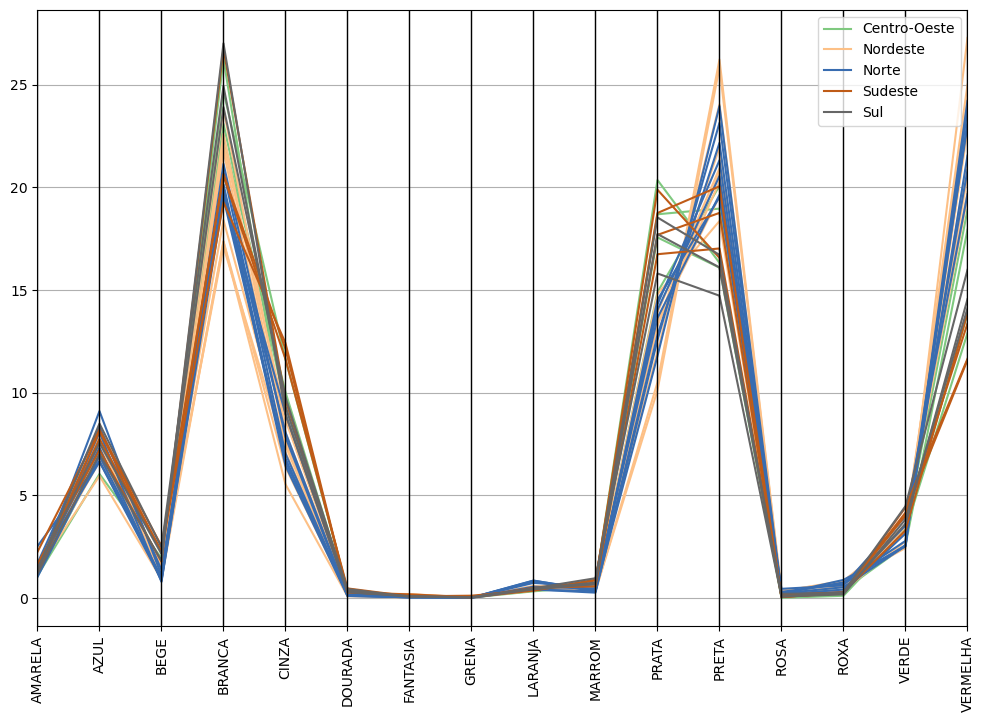

In [45]:
# make a parallel coordinates plot using pandas from df5 dataframe
# use 'Região' as color

from pandas.plotting import parallel_coordinates
import matplotlib.pyplot as plt

# change figure size

plt.figure(figsize=(12, 8))

parallel_coordinates(df5.drop('UF', axis=1), class_column='Região', colormap='Accent')

# q: what are most used colormaps?

# a: https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html

# change labels of parallel coordinates plot to be vertical



plt.xticks(rotation=90)

plt.show()

In [46]:
# use geobr to make a map of Brazil with states colored by 'Azul'

import geobr

# get shapefile of Brazil states

df_mapa = geobr.read_state()

df_mapa

/home/luizcelso/miniconda3/envs/misc/lib/python3.11/site-packages/geopandas/array.py:93: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  aout[:] = out


code_state abbrev_state           name_state  code_region   name_region  \
0         11.0           RO             Rondônia          1.0         Norte   
1         12.0           AC                 Acre          1.0         Norte   
2         13.0           AM             Amazonas          1.0         Norte   
3         14.0           RR              Roraima          1.0         Norte   
4         15.0           PA                 Pará          1.0         Norte   
5         16.0           AP                Amapá          1.0         Norte   
6         17.0           TO            Tocantins          1.0         Norte   
7         21.0           MA             Maranhão          2.0      Nordeste   
8         22.0           PI                Piauí          2.0      Nordeste   
9         23.0           CE                Ceará          2.0      Nordeste   
10        24.0           RN  Rio Grande Do Norte          2.0      Nordeste   
11        25.0           PB              Paraíba          2.0      Nordeste   
12        26.0           PE           Pernambuco          2.0      Nordeste   
13        27.0           AL              Alagoas          2.0      Nordeste   
14        28.0           SE              Sergipe          2.0      Nordeste   
15        29.0           BA                Bahia          2.0      Nordeste   
16        31.0           MG         Minas Gerais          3.0       Sudeste   
17        32.0           ES       Espirito Santo          3.0       Sudeste   
18        33.0           RJ       Rio De Janeiro          3.0       Sudeste   
19        35.0           SP            São Paulo          3.0       Sudeste   
20        41.0           PR               Paraná          4.0           Sul   
21        42.0           SC       Santa Catarina          4.0           Sul   
22        43.0           RS    Rio Grande Do Sul          4.0           Sul   
23        50.0           MS   Mato Grosso Do Sul          5.0  Centro Oeste   
24        51.0           MT          Mato Grosso          5.0  Centro Oeste   
25        52.0           GO                Goiás          5.0  Centro Oeste   
26        53.0           DF     Distrito Federal          5.0  Centro Oeste   

                                             geometry  
0   MULTIPOLYGON (((-63.32721 -7.97672, -62.86662 ...  
1   MULTIPOLYGON (((-73.18253 -7.33550, -72.58477 ...  
2   MULTIPOLYGON (((-67.32609 2.02971, -67.31682 2...  
3   MULTIPOLYGON (((-60.20051 5.26434, -60.19273 5...  
4   MULTIPOLYGON (((-54.95431 2.58369, -54.93542 2...  
5   MULTIPOLYGON (((-51.17970 4.00008, -51.17739 3...  
6   MULTIPOLYGON (((-48.35878 -5.17008, -48.33846 ...  
7   MULTIPOLYGON (((-45.84073 -1.04548, -45.84099 ...  
8   MULTIPOLYGON (((-41.74605 -2.80350, -41.73488 ...  
9   MULTIPOLYGON (((-41.16703 -4.46736, -41.17757 ...  
10  MULTIPOLYGON (((-37.25329 -4.83156, -37.24905 ...  
11  MULTIPOLYGON (((-37.22269 -6.04215, -37.21642 ...  
12  MULTIPOLYGON (((-32.39705 -3.83294, -32.39774 ...  
13  MULTIPOLYGON (((-35.46753 -8.81744, -35.46430 ...  
14  MULTIPOLYGON (((-37.99245 -9.52511, -37.98933 ...  
15  MULTIPOLYGON (((-39.36446 -8.53785, -39.35681 ...  
16  MULTIPOLYGON (((-41.87545 -20.76487, -41.87338...  
17  MULTIPOLYGON (((-41.87545 -20.76487, -41.87920...  
18  MULTIPOLYGON (((-41.85946 -20.76517, -41.85748...  
19  MULTIPOLYGON (((-44.90215 -23.35392, -44.90650...  
20  MULTIPOLYGON (((-52.05188 -22.53933, -52.03446...  
21  MULTIPOLYGON (((-48.63865 -25.96873, -48.63434...  
22  MULTIPOLYGON (((-51.90486 -27.45935, -51.90129...  
23  MULTIPOLYGON (((-56.10370 -17.17354, -56.09692...  
24  MULTIPOLYGON (((-54.89485 -17.62150, -54.89704...  
25  MULTIPOLYGON (((-50.16015 -12.42007, -50.15856...  
26  MULTIPOLYGON (((-47.57461 -15.51341, -47.56997...

In [49]:
df_cores = df4.pivot_table(index=['Região', 'Sigla'], columns='Cor Veículo', values='Percentual').reset_index()

df_cores

Cor Veículo        Região Sigla   AMARELA      AZUL      BEGE     BRANCA  \
0            Centro-Oeste    DF  1.090327  6.047262  1.948504  24.684482   
1            Centro-Oeste    GO  1.139779  7.173283  1.747748  22.424090   
2            Centro-Oeste    MS  1.286670  7.762537  1.639876  23.098242   
3            Centro-Oeste    MT  1.075823  6.821456  0.985568  26.254732   
4                Nordeste    AL  1.381073  6.651429  1.301607  22.619930   
5                Nordeste    BA  1.381233  7.024090  1.435095  23.830104   
6                Nordeste    CE  1.152121  7.571115  1.309303  17.116829   
7                Nordeste    MA  1.361016  5.953531  0.916414  17.357163   
8                Nordeste    PB  1.219976  6.787258  1.568852  18.410618   
9                Nordeste    PE  1.247703  7.180226  1.646066  19.811646   
10               Nordeste    PI  1.226433  7.328541  1.131540  17.382661   
11               Nordeste    RN  1.247439  7.952431  1.463371  21.786264   
12               Nordeste    SE  1.158636  6.978359  1.608250  22.103813   
13                  Norte    AC  1.398789  7.326740  0.835776  19.473764   
14                  Norte    AM  1.697397  8.358319  1.371020  19.654758   
15                  Norte    AP  2.526572  6.672892  1.014919  21.151784   
16                  Norte    PA  1.591756  6.641199  0.891216  20.157644   
17                  Norte    RO  1.118813  8.079263  0.791269  19.885385   
18                  Norte    RR  1.178311  9.107782  1.105475  19.910379   
19                  Norte    TO  1.028559  6.920830  0.988189  20.781798   
20                Sudeste    ES  1.665667  7.210589  1.776372  26.753986   
21                Sudeste    MG  1.287921  7.752760  2.297220  20.655042   
22                Sudeste    RJ  2.252864  8.208913  2.537661  20.573048   
23                Sudeste    SP  1.333698  8.136045  2.247393  19.286837   
24                    Sul    PR  1.389358  7.560963  2.150914  23.918794   
25                    Sul    RS  1.381785  8.500814  2.478531  24.937903   
26                    Sul    SC  1.174956  7.024475  1.818562  27.019330   

Cor Veículo      CINZA   DOURADA  FANTASIA     GRENA   LARANJA    MARROM  \
0            11.633839  0.403845  0.045257  0.036998  0.352527  0.714096   
1            10.034315  0.274049  0.115622  0.029342  0.331224  0.569372   
2             9.328182  0.282576  0.058160  0.030800  0.422171  0.643631   
3             7.659947  0.171603  0.067246  0.017172  0.412877  0.417615   
4             7.762371  0.234001  0.083585  0.013759  0.421857  0.406881   
5             8.068534  0.221777  0.198679  0.021880  0.497497  0.500352   
6             7.105689  0.232943  0.063138  0.024947  0.594791  0.463286   
7             5.546677  0.091977  0.036024  0.011210  0.794401  0.325511   
8             7.430385  0.228549  0.077293  0.014408  0.494561  0.537914   
9             8.672841  0.277289  0.119905  0.021718  0.481986  0.528557   
10            6.387632  0.168668  0.042237  0.010771  0.555281  0.359370   
11            7.574238  0.276238  0.074693  0.017277  0.575337  0.477258   
12            8.859020  0.249738  0.179996  0.022782  0.375788  0.584046   
13            6.800154  0.149787  0.027684  0.025936  0.808675  0.333669   
14            8.980719  0.278716  0.075116  0.023196  0.740102  0.559517   
15            7.850584  0.103048  0.045005  0.023133  0.856772  0.347840   
16            6.651084  0.168756  0.105263  0.019576  0.846712  0.395302   
17            6.454530  0.109436  0.049667  0.026149  0.420850  0.267096   
18            8.073294  0.152326  0.110178  0.017377  0.556804  0.462155   
19            7.041472  0.131173  0.037679  0.013223  0.411306  0.344959   
20            9.642245  0.330466  0.107360  0.038451  0.503432  0.574557   
21           12.132556  0.275732  0.182994  0.044137  0.442887  0.735942   
22           11.643718  0.473297  0.087114  0.118120  0.393208  0.894342   
23           12.420013  0.288017  0.126154  0.0

In [50]:
# merge df_mapa and df_cores

df_mapa_cores = pd.merge(df_mapa, df_cores, left_on='abbrev_state', right_on='Sigla')

df_mapa_cores

code_state abbrev_state           name_state  code_region   name_region  \
0         11.0           RO             Rondônia          1.0         Norte   
1         12.0           AC                 Acre          1.0         Norte   
2         13.0           AM             Amazonas          1.0         Norte   
3         14.0           RR              Roraima          1.0         Norte   
4         15.0           PA                 Pará          1.0         Norte   
5         16.0           AP                Amapá          1.0         Norte   
6         17.0           TO            Tocantins          1.0         Norte   
7         21.0           MA             Maranhão          2.0      Nordeste   
8         22.0           PI                Piauí          2.0      Nordeste   
9         23.0           CE                Ceará          2.0      Nordeste   
10        24.0           RN  Rio Grande Do Norte          2.0      Nordeste   
11        25.0           PB              Paraíba          2.0      Nordeste   
12        26.0           PE           Pernambuco          2.0      Nordeste   
13        27.0           AL              Alagoas          2.0      Nordeste   
14        28.0           SE              Sergipe          2.0      Nordeste   
15        29.0           BA                Bahia          2.0      Nordeste   
16        31.0           MG         Minas Gerais          3.0       Sudeste   
17        32.0           ES       Espirito Santo          3.0       Sudeste   
18        33.0           RJ       Rio De Janeiro          3.0       Sudeste   
19        35.0           SP            São Paulo          3.0       Sudeste   
20        41.0           PR               Paraná          4.0           Sul   
21        42.0           SC       Santa Catarina          4.0           Sul   
22        43.0           RS    Rio Grande Do Sul          4.0           Sul   
23        50.0           MS   Mato Grosso Do Sul          5.0  Centro Oeste   
24        51.0           MT          Mato Grosso          5.0  Centro Oeste   
25        52.0           GO                Goiás          5.0  Centro Oeste   
26        53.0           DF     Distrito Federal          5.0  Centro Oeste   

                                             geometry        Região Sigla  \
0   MULTIPOLYGON (((-63.32721 -7.97672, -62.86662 ...         Norte    RO   
1   MULTIPOLYGON (((-73.18253 -7.33550, -72.58477 ...         Norte    AC   
2   MULTIPOLYGON (((-67.32609 2.02971, -67.31682 2...         Norte    AM   
3   MULTIPOLYGON (((-60.20051 5.26434, -60.19273 5...         Norte    RR   
4   MULTIPOLYGON (((-54.95431 2.58369, -54.93542 2...         Norte    PA   
5   MULTIPOLYGON (((-51.17970 4.00008, -51.17739 3...         Norte    AP   
6   MULTIPOLYGON (((-48.35878 -5.17008, -48.33846 ...         Norte    TO   
7   MULTIPOLYGON (((-45.84073 -1.04548, -45.84099 ...      Nordeste    MA   
8   MULTIPOLYGON (((-41.74605 -2.80350, -41.73488 ...      Nordeste    PI   
9   MULTIPOLYGON (((-41.16703 -4.46736, -41.17757 ...      Nordeste    CE   
10  MULTIPOLYGON (((-37.25329 -4.83156, -37.24905 ...      Nordeste    RN   
11  MULTIPOLYGON (((-37.22269 -6.04215, -37.21642 ...      Nordeste    PB   
12  MULTIPOLYGON (((-32.39705 -3.83294, -32.39774 ...      Nordeste    PE   
13  MULTIPOLYGON (((-35.46753 -8.81744, -35.46430 ...      Nordeste    AL   
14  MULTIPOLYGON (((-37.99245 -9.52511, -37.98933 ...      Nordeste    SE   
15  MULTIPOLYGON (((-39.36446 -8.53785, -39.35681 ...      Nordeste    BA   
16  MULTIPOLYGON (((-41.87545 -20.76487, -41.87338...       Sudeste    MG   
17  MULTIPOLYGON (((-41.87545 -20.76487, -41.87920...       Sudeste    ES   
18  MULTIPOLYGON (((-41.85946 -20.76517, -41.85748...       Sudeste    RJ   
19  MULTIPOLYGON (((-44.90215 -23.35392, -44.90650...       Sudeste    SP   
20  MULTIPOLYGON (((-52.05188 -22.53933, -52.03446...           Sul    PR   
21  MULTIPOLYGON (((-48.63865 -25.96873, -48.63434...           Sul    SC   
22  MULTIPOLYGON (((

/home/luizcelso/miniconda3/envs/misc/lib/python3.11/site-packages/geopandas/plotting.py:33: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in geom:
/home/luizcelso/miniconda3/envs/misc/lib/python3.11/site-packages/descartes/patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([
/home/luizcelso/miniconda3/envs/misc/lib/python3.11/site-packages/descartes/patch.py:64: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  [asarray(r)[:, :2] for r in t.interiors])


<Axes: >

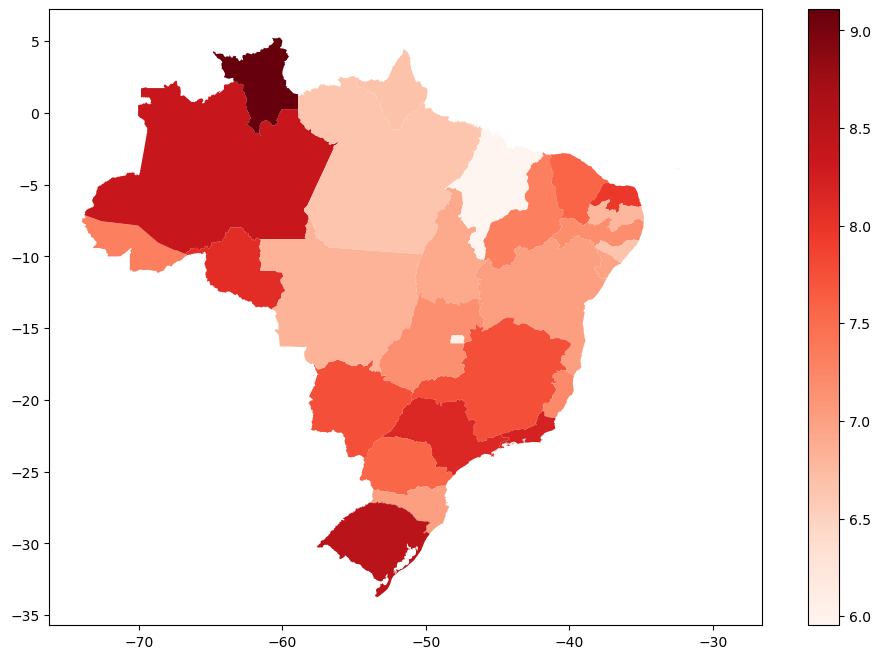

In [54]:
# make a map of Brazil with states colored by 'Azul'
# use white to red colormap

df_mapa_cores.plot(column='AZUL', cmap='Reds', figsize=(12, 8), legend=True)


/home/luizcelso/miniconda3/envs/misc/lib/python3.11/site-packages/geopandas/plotting.py:33: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in geom:
/home/luizcelso/miniconda3/envs/misc/lib/python3.11/site-packages/descartes/patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([
/home/luizcelso/miniconda3/envs/misc/lib/python3.11/site-packages/descartes/patch.py:64: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  [asarray(r)[:, :2] for r in t.interiors])
/home/luizcelso/miniconda3/envs/misc/lib/python3.11/site-packages/geopandas/plotting.py:33: ShapelyDeprecationWarning: Iteration over multi-part

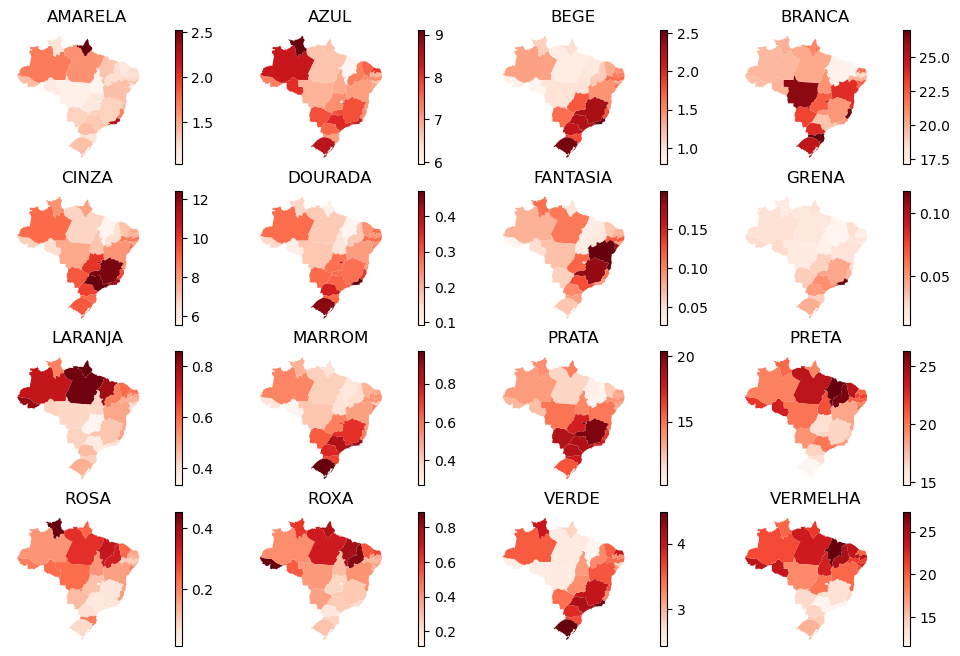

In [57]:
cores = df3['Cor Veículo'].unique()

# make a grid of map of states from dataframe df_mapa_cores for each column in cores

import matplotlib.pyplot as plt

fig, axs = plt.subplots(4, 4, figsize=(12, 8))

for i, ax in enumerate(axs.flatten()):
    df_mapa_cores.plot(column=cores[i], cmap='Reds', legend=True, ax=ax)
    ax.set_title(cores[i])
    ax.set_axis_off()

In [56]:
len(cores)

16